In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
from keras import regularizers
import matplotlib.pyplot as plt
import keras
from keras.applications.vgg16 import VGG16

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 50s 0us/step


In [3]:
model=Sequential()

weight_decay=0.0005 #simplies that the regularization for L@ regularization is set to 0.0005
model.add(Conv2D(64,(3,3),padding='same',input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay),activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer=SGD(learning_rate=0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

In [6]:
training_history=model.fit(x_train,y_train,batch_size=1000,epochs=10,validation_data=(x_test,y_test),callbacks=[callback])

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 664ms/step - accuracy: 0.1311 - loss: 5.0085 - val_accuracy: 0.1190 - val_loss: 5.8119
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step - accuracy: 0.2430 - loss: 4.2533 - val_accuracy: 0.1675 - val_loss: 4.3594
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - accuracy: 0.2879 - loss: 4.1132 - val_accuracy: 0.2325 - val_loss: 4.1424
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.3422 - loss: 3.9455 - val_accuracy: 0.2459 - val_loss: 4.0897
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 368ms/step - accuracy: 0.3879 - loss: 3.8162 - val_accuracy: 0.3681 - val_loss: 3.7574
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 377ms/step - accuracy: 0.4227 - loss: 3.6968 - val_accuracy: 0.3392 - val_loss: 3.8250
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - accuracy: 0.4549 - loss: 3.5928 - val_accuracy: 0.4643 - val_loss: 3.5255
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - accuracy: 0.4962 - loss: 3.5028 - val_accu

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','horse','ship','truck']

In [10]:
def prediction(index):
  predict_image=tf.expand_dims(x_test[index],0)
  pred_label=classes[np.argmax(model.predict(predict_image))]
  imresized=tf.image.resize(x_test[index],(32,32))
  plt.figure(figsize=(2,2))
  plt.imshow(imresized.numpy().astype('uint8'))
  plt.xlabel(pred_label)
  print('prediction label',pred_label)
  print('actual label',classes[int(y_test[index][0])])
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
prediction label truck
actual label truck


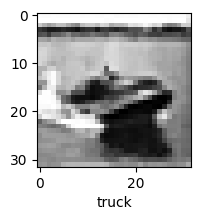

In [13]:
prediction(150)

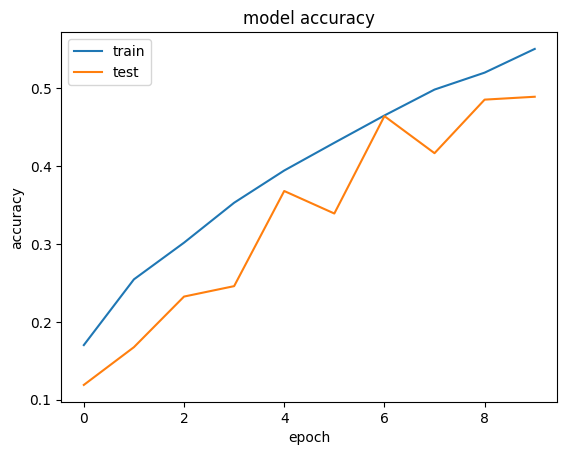

In [14]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

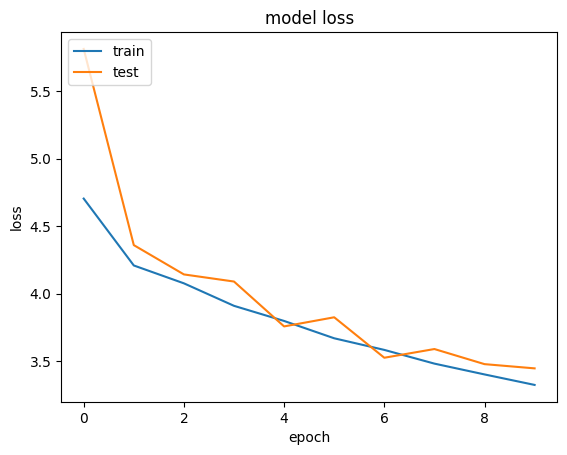

In [15]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')